# Final Project Report

* Class: DS 5100
* Student Name: Sean Hersee
* Student Net ID: cjf4xv
* This URL: https://github.com/herseesean/Final_Project

# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/herseesean/Final_Project

Paste a copy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

In [22]:
'''
import pandas as pd
import numpy as np

class Die():
    """
    This class will create a Die that can be used within the Monte Carlo Simulation.
    
    A die in this insatance is an item with N sides, with each side having a unique "Face" value. These Face 
    values will each be assigned a "Weight", or probability of being "rolled".

    Default Values:
    1) The Weight of each face is 1
    2) The number of times rolled is 1
    3) The behavior of the dice is roll

    Characteristics:
    1) A die has N number of sides, each with W weight
    2) The weights are any positive number
    """

    def __init__(self,faces):
        """
        This method will initialize the die that will be used throughout the class.

        Args:
        1) faces: The values of the faces to be included on the dice

        Requirements:
        1) faces must be a Numpy Array
        2) Numpy array data type must be either strings or numbers
        3) Each face on the die must be a unique value and cannot be repeated
        
        Defaults:
        1) All faces will have a weight of 1

        Results:
        1) Creates a Pandas DataFrame of the faces and their corresponding weights.
        """
        self.faces=faces
        if isinstance(self.faces, np.ndarray)==False:
            raise TypeError ("Faces Must be in a Numpy Array")
        if len(self.faces)!=len(set(self.faces)):
            raise ValueError ("Die values must be Unique")

        self._die=pd.DataFrame({'face':faces,'weights':1}).set_index('face')


    def change_weight(self,face,weight):
        """
        This method will change the weight value for a specified face.

        Args:
        1) faces: The value of the face to be changed
        2) weight: The numeric value of the weight assiged to the face

        Requirements:
        1) faces must exist within the initialized die
        2) weight value must be numeric (either integer or float)

        Results:
        1) Modifies weight value within the existing _die dataframe for the specified face
        """
        
        try:
            weight=float(weight)
        except (ValueError,TypeError):
            raise TypeError ('Weight Must be a Numeric Value')
        if face in self.faces:
            self._die.loc[face]=weight
        else:
            raise IndexError (f"{face} is not a valid value")

    def roll(self,rolls=1):
        """
        This method will roll the initialized dice a specified number of times and returns the results.

        Args:
        1) rolls: the number of times the result should be rolled

        Requirements:
        1) rolls must be a positive integer

        Results:
        1) returns a list of the outcomes from the sample of rolls
        """
        self.rolls=rolls
        weight_probs=[i/sum(self._die.weights) for i in self._die.weights]
        temp=self._die.sample(self.rolls,replace=True, weights=weight_probs)
        return temp.index.tolist()

    def show_die(self):
        """
        This method returns the current face and weight value for the initalized die.

        Results:
        1) A Pandas dataframe showing each face and its corresonding weight for the initialized die.
        """
        return self._die




class Game():
    """
    This class uses the initialized die to simulate a "game" of rolls for those die.

    A game can be played any number of times for one or more similar die. Each set of die within the game will have
    the same faces and number of rolls, however, each may have their own weights for each face.

    Default Values:
    1) The behavior of the game is to roll a set of dice a given number of times

    Characteristics:
    1) Each die has the same number of sides
    2) Each die has the same face values
    3) Each die may have different weight values for each face
    """
    def __init__(self,dice):
        """
        This method will initialize the game that will be used throughout the class.

        Args:
        1) dice: An already instantiated list of dice created through the Die class

        Requirements:
        1) faces on each die must match
        2) the dice passed to the method must be instantiated through the Die class

        Results:
        1) Initializes variable _results that is built with a None value to be overwritten later in the class
        """
        self.dice=dice
        self._results=None

    def play(self,n_rolls):
        """
        This method will simulate playing a game for the given set of die.

        Args:
        1) n_rolls: the number of times each dice should be rolled within the game

        Requirements:
        1) the number of rolls must be a postive integer

        Results:
        1) The results of the rolls are saved to a private dataframe, _results.
        """
        results = {}
        for i in range(len(self.dice)):
            roll = self.dice[i].roll(n_rolls)
            results[i] = roll

        self._results = pd.DataFrame(results)
        self._results.index.name = 'roll_num'
            
    def results(self,type='wide'):
        """
        This method will return a copy of the game results to the user in a specified format.

        Args:
        1) type: The dataframe format that should be returned to the user

        Defaults:
        1) Type will default to 'wide'

        Requirements:
        1) The type passed to the method must be either 'narrow' or 'wide'

        Results:
        1) The _results dataframe will be retunred to the user in either the 'narrow' or 'wide' format
        """
        if type.lower() =='narrow':
            return self._results.melt(
                ignore_index=False,
                value_name='Outcome',
                var_name='Die Number',
            ).rename_axis('Roll Number').reset_index().set_index(['Roll Number', 'Die Number'])
        
        elif type.lower() =='wide':
            return self._results
        
        else:
            raise ValueError ('Format Must be "Narrow" or "Wide"')
    


class Analyzer():
    """
    This class extracts statistical metrics from a completed game.

    Characteristics:
    1) The object takes the result of a single game and returns the specified statistical properties.
    """
    def __init__(self,game):
        """
        This method will initialize the method with a completed game as the parameter.

        Args:
        1) game: An already instantiated result from a played game

        Requirements:
        1) Value passed as game must be a Game object

        Results:
        1) Initializes variable _game with the details of the game played
        2) Initializes _results with the results of the rolls of the specified game
        3) Initializes _num_dice with the number of dice used in the game
        4) Initializes _faces with a Series of the face values used on the die in the game
        """
        if not isinstance(game, Game):
            raise ValueError("Input must be a Game object.")
        else:
            self._game = game
            self._results = self._game._results
            self._num_dice = len(self._results.columns)
            self._faces = pd.Series(self._game.dice[0]._die.index).unique()

    def jackpot(self):
        """
        This method will calculate the number of jackpots rolled in the initialized game.

        A jackpot is determined as a roll where all faces are the same.

        Results:
        1) Returns an integer of the number of jackpots rolled to the user
        """
        jackpots=0

        for index, roll in self._results.iterrows():
            if len(set(roll)) == 1:
                jackpots+=1
        
        return jackpots

    def face_counts(self):
        """
        This method will calculate the number of times each face appears for each roll of all dice in the game.

        Results:
        1) Returns a dataframe of the roll number and corresponding count of the times each face appeared for 
        each roll in the game.
        """
        face_counts=[]
        for index, row in self._results.iterrows():
            counts = row.value_counts().reindex(self._faces, fill_value=0)
            face_counts.append(counts)

        counts = pd.DataFrame(face_counts, index=self._results.index)
        counts.index.name = 'roll_num'
        counts.columns.name = 'face'
        return counts

    def combo_count(self):
        """
        This method will calculate the number of distinct combinations of faces rolled and the number of times
        that combination occured.

        Results:
        1) Returns a dataframe of the distinct combination of face values and a count of the number of times
        that combination appeared in the game.
        """
        combinations = self._results.apply(lambda row: sorted(row), axis=1)
        combinations=combinations.to_numpy().tolist()
        combinations=pd.DataFrame(combinations)
        combo_counts = combinations.value_counts().reset_index(name='count')
        cols=[col for col in combo_counts.columns if col !='count']
        combo_counts = combo_counts.set_index(cols)
        return combo_counts


    def perm_count(self):
        """
        This method will calculate the number of distinct permutations of faces rolled and the number of times
        that combination occured.

        Results:
        1) Returns a dataframe of the distinct permutations of face values and a count of the number of times
        that sequence appeared in the game.
        """
        perms_list=self._results.to_numpy().tolist()
        perm_df=pd.DataFrame(perms_list)
        perm_df=perm_df.value_counts().reset_index(name='count')
        cols=[col for col in perm_df.columns if col !='count']
        output=perm_df.set_index(cols)

        return output


#if __name__ == "__main__":

### Live Code Tests 

    # ## Die Class Tests

    # # Test Die Class - Scenario 1
    # test_die=Die(np.array(['H','T']))
    # test_die.change_weight('H',1)
    # print(test_die.roll(10))
    # print(test_die.show_die())

    # # Test Die Class - Scenario 2
    # test_die=Die(np.array([1,2,3,4,5,6]))
    # test_die.change_weight(1,2)
    # print(test_die.roll(10))
    # print(test_die.show_die())

    # # Test Die Class - Scenraio 3
    # test_die=Die(np.array(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S',
    #                    'T','U','V','W','X','Y','Z']))
    # letter_prob=pd.read_table('english_letters.txt',names=['Count'],index_col=0,header=None,delimiter=' ')
    # letter_prob['prob']=letter_prob.Count/sum(letter_prob.Count)
    # for i in letter_prob.index:
    #     test_die.change_weight(i,letter_prob.loc[i,'prob'])
    # print(test_die.roll(10))
    # print(test_die.show_die())
    

    # ## Game Class Tests

    # # Test Game Class - Scenario 1
    # fair_coin=Die(np.array(["H","T"]))
    # unfair_coin=Die(np.array(["H","T"]))
    # unfair_coin.change_weight("H",5)
    # game1=Game([fair_coin,unfair_coin])
    # game1.play(1000)
    # print(game1.results('narrow'))
    # print(game1.results('wide'))

    # # Test Game Class - Scenario 2
    # die1=Die(np.array([1,2,3,4,5,6]))
    # die2=Die(np.array([1,2,3,4,5,6]))
    # die3=Die(np.array([1,2,3,4,5,6]))
    # unfair_die1=Die(np.array([1,2,3,4,5,6]))
    # unfair_die2=Die(np.array([1,2,3,4,5,6]))
    # unfair_die1.change_weight(6,5)
    # unfair_die2.change_weight(1,5)
    # game1=Game([die1,die2,die3])
    # game2=Game([die1,die2,die3,unfair_die1,unfair_die2])
    # game1.play(10000)
    # game2.play(10000)
    # print(game1.results('narrow'))
    # print(game1.results('wide'))
    # print(game2.results('narrow'))
    # print(game2.results('wide'))

    # # Test Game Class - Scenario 3
    # alph_die=Die(np.array(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S',
    #                    'T','U','V','W','X','Y','Z']))
    # letter_prob=pd.read_table('english_letters.txt',names=['Count'],index_col=0,header=None,delimiter=' ')
    # letter_prob['prob']=letter_prob.Count/sum(letter_prob.Count)
    # for i in letter_prob.index:
    #     alph_die.change_weight(i,letter_prob.loc[i,'prob'])
    # game1=Game([alph_die,alph_die,alph_die,alph_die])
    # game1.play(10000)
    # print(game1.results('narrow'))
    # print(game1.results('wide'))


    ## Test Analyzer Class

    # Test Analyzer Class - Scenario 1
    # fair_coin=Die(np.array(["H","T"]))
    # unfair_coin=Die(np.array(["H","T"]))
    # unfair_coin.change_weight("H",5)
    # game1=Game([fair_coin,unfair_coin])
    # game1.play(1000)

    # analyze=Analyzer(game1)
    # print(analyze.jackpot())
    # print(analyze.face_counts())
    # print(analyze.combo_count())
    # print(analyze.perm_count())


    # Test Analyzer Class - Scenario 2
    # die1=Die(np.array([1,2,3,4,5,6]))
    # die2=Die(np.array([1,2,3,4,5,6]))
    # die3=Die(np.array([1,2,3,4,5,6]))
    # unfair_die1=Die(np.array([1,2,3,4,5,6]))
    # unfair_die2=Die(np.array([1,2,3,4,5,6]))
    # unfair_die1.change_weight(6,5)
    # unfair_die2.change_weight(1,5)
    # game1=Game([die1,die2,die3])
    # game2=Game([die1,die2,die3,unfair_die1,unfair_die2])
    # game1.play(10000)
    # game2.play(10000)

    # analyze=Analyzer(game1)
    # print(analyze.jackpot())
    # print(analyze.face_counts())
    # print(analyze.combo_count())
    # print(analyze.perm_count())

    # analyze=Analyzer(game2)
    # print(analyze.jackpot())
    # print(analyze.face_counts())
    # print(analyze.combo_count())
    # print(analyze.perm_count())



    # # Test Analyzer Class - Scenario 3
    # alph_die=Die(np.array(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S',
    #                    'T','U','V','W','X','Y','Z']))
    # letter_prob=pd.read_table('english_letters.txt',names=['Count'],index_col=0,header=None,delimiter=' ')
    # letter_prob['prob']=letter_prob.Count/sum(letter_prob.Count)
    # for i in letter_prob.index:
    #     alph_die.change_weight(i,letter_prob.loc[i,'prob'])
    # game1=Game([alph_die,alph_die,alph_die,alph_die])
    # game1.play(1000)


    # analyze=Analyzer(game1)
    # print(analyze.jackpot())
    # print(analyze.face_counts())
    # print(analyze.combo_count())
    # print(analyze.perm_count())

    # perm_table=analyze.perm_count().index.to_list()
    # perm_results=[]
    
    # for n in perm_table:
    #     out=''
    #     for i in n:
    #         out+=i
    #     perm_results.append(out)

    # english_words=pd.read_table('scrabble_words.txt',names=['Word'],header=None)
    # words=[]
    # words=set(words)
    # for i in english_words['Word']:
    #     words.add(i)

    # results=list(set(perm_results) & set(words))
    # print(results)
    # print(len(results))

'''

'\nimport pandas as pd\nimport numpy as np\n\nclass Die():\n    """\n    This class will create a Die that can be used within the Monte Carlo Simulation.\n\n    A die in this insatance is an item with N sides, with each side having a unique "Face" value. These Face \n    values will each be assigned a "Weight", or probability of being "rolled".\n\n    Default Values:\n    1) The Weight of each face is 1\n    2) The number of times rolled is 1\n    3) The behavior of the dice is roll\n\n    Characteristics:\n    1) A die has N number of sides, each with W weight\n    2) The weights are any positive number\n    """\n\n    def __init__(self,faces):\n        """\n        This method will initialize the die that will be used throughout the class.\n\n        Args:\n        1) faces: The values of the faces to be included on the dice\n\n        Requirements:\n        1) faces must be a Numpy Array\n        2) Numpy array data type must be either strings or numbers\n        3) Each face on the

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

In [23]:
'''
import unittest
from project_classes import Die, Game, Analyzer
import numpy as np
import pandas as pd


class TestDie(unittest.TestCase):

    def setUp(self):
        self.test_die=Die(np.array([1,2,3,4,5,6]))

    def test1_init_(self):
        
        self.assertIsInstance(self.test_die._die,pd.DataFrame)

    def test2_change_weight(self):
        self.test_die.change_weight(1,2)
        expected=2
        check=self.test_die._die.loc[1,'weights']
        self.assertEqual(check,expected)

    def test3_roll(self):
        check=self.test_die.roll(10)
        test=len(check)
        expected=10
        self.assertEqual(test,expected)


    def test4_show_die(self):
        check=list(self.test_die.show_die().index)
        expected=[1,2,3,4,5,6]
        self.assertEqual(check,expected)


class TestGame(unittest.TestCase):

    def setUp(self):
        self.test_die1 = Die(np.array([1,2,3,4,5,6]))
        self.test_die2 = Die(np.array([1,2,3,4,5,6]))
        self.test_die3 = Die(np.array([1,2,3,4,5,6]))
        self.test_unfair_die1 = Die(np.array([1,2,3,4,5,6]))
        self.test_unfair_die2 = Die(np.array([1,2,3,4,5,6]))
        self.test_game = Game([self.test_die1, self.test_die2, self.test_die3, self.test_unfair_die1, self.test_unfair_die2])


    def test5_init_(self):
        self.assertTrue(len(self.test_game.dice),5)

    def test6_play(self):
        self.test_game.play(1000)
        check=self.test_game._results
        shape=check.shape
        col_expected=5
        row_expected=1000
        self.assertEqual(shape[0],row_expected)
        self.assertEqual(shape[1],col_expected)

    def test7_results(self):
        self.test_game.play(1000)
        checkwide=self.test_game.results('wide')
        checknarrow=self.test_game.results('narrow')
        
        ##Check Wide
        wide_col_expected=5
        wide_row_expected=1000
        shape=checkwide.shape
        self.assertEqual(shape[0],wide_row_expected)
        self.assertEqual(shape[1],wide_col_expected)

        ##Check Narrow
        narrow_col_expected=1
        narrow_row_expected=5000
        shape=checknarrow.shape
        self.assertEqual(shape[0],narrow_row_expected)
        self.assertEqual(shape[1],narrow_col_expected)


class TestAnalyzer (unittest.TestCase):

    def setUp(self):
        self.alph_die=Die(np.array(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S',
                       'T','U','V','W','X','Y','Z']))
        letter_prob=pd.read_table('english_letters.txt',names=['Count'],index_col=0,header=None,delimiter=' ')
        letter_prob['prob']=letter_prob.Count/sum(letter_prob.Count)
        for i in letter_prob.index:
            self.alph_die.change_weight(i,letter_prob.loc[i,'prob'])
        self.test_game=Game([self.alph_die,self.alph_die,self.alph_die,self.alph_die])
        self.test_game.play(1000)
        self.test_analyze=Analyzer(self.test_game)

    def test8__init__(self):
        self.assertEqual(len(self.test_analyze._results),1000)

    def test9_jackpot(self):
        self.assertGreaterEqual(self.test_analyze.jackpot(),0)

    def test10_face_counts(self):
        self.assertEqual(len(self.test_analyze.face_counts()),1000)
        self.assertIsInstance(self.test_analyze.face_counts(),pd.DataFrame)

    def test11_combocounts (self):
        test=self.test_analyze.combo_count()
        self.assertEqual(test['count'].sum(),1000)
        self.assertIsInstance(self.test_analyze.combo_count(),pd.DataFrame)

    def test12_permcounts (self):
        self.assertGreaterEqual(len(self.test_analyze.perm_count()),0)
        self.assertIsInstance(self.test_analyze.perm_count(),pd.DataFrame)

if __name__ == '__main__':
    unittest.main()
'''

"\nimport unittest\nfrom project_classes import Die, Game, Analyzer\nimport numpy as np\nimport pandas as pd\n\n\nclass TestDie(unittest.TestCase):\n\n    def setUp(self):\n        self.test_die=Die(np.array([1,2,3,4,5,6]))\n\n    def test1_init_(self):\n\n        self.assertIsInstance(self.test_die._die,pd.DataFrame)\n\n    def test2_change_weight(self):\n        self.test_die.change_weight(1,2)\n        expected=2\n        check=self.test_die._die.loc[1,'weights']\n        self.assertEqual(check,expected)\n\n    def test3_roll(self):\n        check=self.test_die.roll(10)\n        test=len(check)\n        expected=10\n        self.assertEqual(test,expected)\n\n\n    def test4_show_die(self):\n        check=list(self.test_die.show_die().index)\n        expected=[1,2,3,4,5,6]\n        self.assertEqual(check,expected)\n\n\nclass TestGame(unittest.TestCase):\n\n    def setUp(self):\n        self.test_die1 = Die(np.array([1,2,3,4,5,6]))\n        self.test_die2 = Die(np.array([1,2,3,4,5,6])

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [24]:
from project_classes import Die,Game,Analyzer

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [26]:
help(Die)
help(Game)
help(Analyzer)

Help on class Die in module project_classes:

class Die(builtins.object)
 |  Die(faces)
 |
 |  This class will create a Die that can be used within the Monte Carlo Simulation.
 |
 |  A die in this insatance is an item with N sides, with each side having a unique "Face" value. These Face
 |  values will each be assigned a "Weight", or probability of being "rolled".
 |
 |  Default Values:
 |  1) The Weight of each face is 1
 |  2) The number of times rolled is 1
 |  3) The behavior of the dice is roll
 |
 |  Characteristics:
 |  1) A die has N number of sides, each with W weight
 |  2) The weights are any positive number
 |
 |  Methods defined here:
 |
 |  __init__(self, faces)
 |      This method will initialize the die that will be used throughout the class.
 |
 |      Args:
 |      1) faces: The values of the faces to be included on the dice
 |
 |      Requirements:
 |      1) faces must be a Numpy Array
 |      2) Numpy array data type must be either strings or numbers
 |      3) Eac

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/herseesean/Final_Project/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [27]:
fair_coin=Die(np.array(["H","T"]))
unfair_coin=Die(np.array(["H","T"]))
unfair_coin.change_weight("H",5)

print(fair_coin._die)
print(unfair_coin._die)

      weights
face         
H           1
T           1
      weights
face         
H           5
T           1


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [28]:
game1=Game([fair_coin,unfair_coin])
game1.play(1000)
print(game1._results)

          0  1
roll_num      
0         H  H
1         H  T
2         T  H
3         H  H
4         H  H
...      .. ..
995       T  T
996       T  T
997       H  T
998       T  H
999       H  T

[1000 rows x 2 columns]


Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [29]:
game2=Game([fair_coin,unfair_coin,unfair_coin])
game2.play(1000)
print(game2._results)

          0  1  2
roll_num         
0         H  H  H
1         T  H  H
2         T  T  H
3         T  H  H
4         H  H  H
...      .. .. ..
995       T  T  H
996       H  H  H
997       H  H  H
998       T  H  T
999       T  H  T

[1000 rows x 3 columns]


Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [30]:
analyze_1=Analyzer(game1)
analyze_2=Analyzer(game2)

jackpots_game1=analyze_1.jackpot()
jackpots_game2=analyze_2.jackpot()

print(jackpots_game1, 'Jackpots')
print(jackpots_game2, 'Jackpots')

510 Jackpots
356 Jackpots


Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [31]:
rolls_game1=len(analyze_1._results)
rolls_game2=len(analyze_2._results)

jackpot_freq1=jackpots_game1/rolls_game1
jackpot_freq2=jackpots_game2/rolls_game2

print(jackpot_freq1,'or',(jackpot_freq1)*100,"%", 'of rolls were jackpots for Game #1.')
print(jackpot_freq2,'or',(jackpot_freq2)*100,"%", 'of rolls were jackpots for Game #2.')

0.51 or 51.0 % of rolls were jackpots for Game #1.
0.356 or 35.6 % of rolls were jackpots for Game #2.


Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

Text(0, 0.5, '% Frequency')

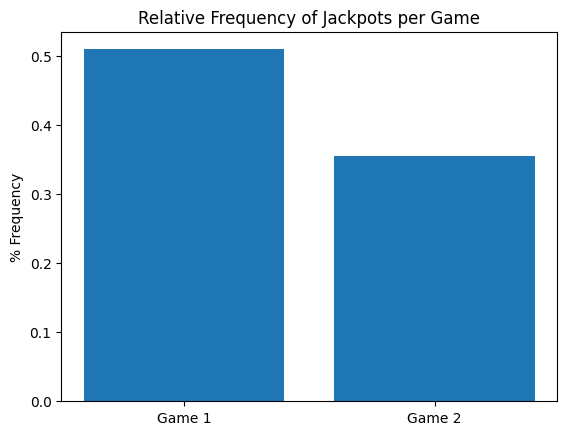

In [32]:
plot=[jackpot_freq1,jackpot_freq2]

plt.bar(['Game 1','Game 2'],plot)
plt.title('Relative Frequency of Jackpots per Game')
plt.ylabel('% Frequency')

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [33]:
die1=Die(np.array([1,2,3,4,5,6]))
die2=Die(np.array([1,2,3,4,5,6]))
die3=Die(np.array([1,2,3,4,5,6]))

display(die1.show_die())
display(die2.show_die())
display(die3.show_die())

,weights
face,
1,1
2,1
3,1
4,1
5,1
6,1


,weights
face,
1,1
2,1
3,1
4,1
5,1
6,1


,weights
face,
1,1
2,1
3,1
4,1
5,1
6,1


Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [34]:
die1.change_weight(6,5)
die1.show_die()

,weights
face,
1,1
2,1
3,1
4,1
5,1
6,5


Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [35]:
die2.change_weight(1,5)
die2.show_die()

,weights
face,
1,5
2,1
3,1
4,1
5,1
6,1


Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [36]:
game3=Game([die3,die3,die3,die3,die3])
game3.play(10000)
game3.results()

,0,1,2,3,4
roll_num,,,,,
0,3,1,6,4,1
1,4,6,3,6,4
2,3,2,6,6,3
3,2,5,3,5,2
4,2,3,1,1,6
...,...,...,...,...,...
9995,2,2,2,1,4
9996,5,4,2,5,6
9997,5,4,5,5,5


Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [37]:
game4=Game([die1,die2,die3,die3,die3])
game4.play(10000)
game4.results()

,0,1,2,3,4
roll_num,,,,,
0,4,1,4,5,2
1,6,1,1,2,6
2,6,1,1,6,2
3,6,5,3,1,3
4,1,3,6,6,1
...,...,...,...,...,...
9995,6,3,4,3,6
9996,6,5,3,3,1
9997,5,3,5,3,3


Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

0.0005 or 0.05 % of rolls were jackpots for Game #1.
0.0005 or 0.05 % of rolls were jackpots for Game #2.


Text(0, 0.5, '% Frequency')

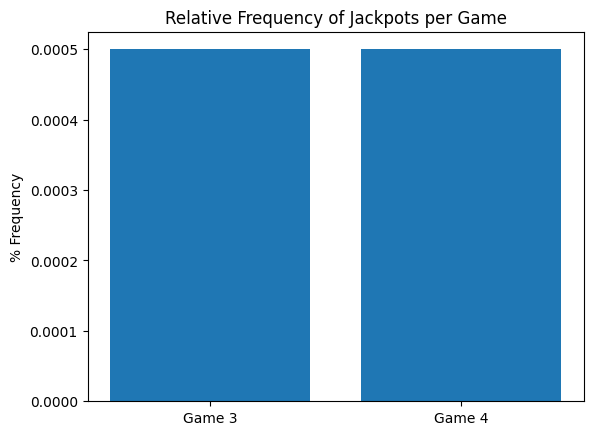

In [38]:
#Initialize Analyzer with games
analyze_3=Analyzer(game3)
analyze_4=Analyzer(game4)

#Calculate Jackpots
jackpots_game3=analyze_3.jackpot()
jackpots_game4=analyze_4.jackpot()

#Determine number of rolls
rolls_game3=len(analyze_3._results)
rolls_game4=len(analyze_4._results)

#Determine Jackpot frequency
jackpot_freq3=jackpots_game3/rolls_game3
jackpot_freq4=jackpots_game4/rolls_game4

print(jackpot_freq3,'or',(jackpot_freq3)*100,"%", 'of rolls were jackpots for Game #1.')
print(jackpot_freq4,'or',(jackpot_freq4)*100,"%", 'of rolls were jackpots for Game #2.')


#Plot Outcomes
plot=[jackpot_freq3,jackpot_freq4]

plt.bar(['Game 3','Game 4'],plot)
plt.title('Relative Frequency of Jackpots per Game')
plt.ylabel('% Frequency')

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [39]:
# Create Die Object
letter_die=Die(np.array(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S',
                 'T','U','V','W','X','Y','Z']))

#Calculate Letter Probabilities 
letter_prob=pd.read_table('english_letters.txt',names=['Count'],index_col=0,header=None,delimiter=' ')
letter_prob['prob']=letter_prob.Count/sum(letter_prob.Count)
for i in letter_prob.index:
    letter_die.change_weight(i,letter_prob.loc[i,'prob'])

letter_die.show_die()

g:\My Drive\M.S. Data Science\DS5100\Final Project\final_project\project_classes.py:69: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.1209652247516903' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  self._die.loc[face]=weight


,weights
face,
A,0.085517
B,0.016048
C,0.031644
D,0.038712
E,0.120965
F,0.021815
G,0.020863
H,0.049557
I,0.073251


Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [40]:
game5=Game([letter_die,letter_die,letter_die,letter_die])
game5.play(1000)

game5.results()

,0,1,2,3
roll_num,,,,
0,W,L,A,I
1,A,E,E,N
2,U,L,A,H
3,S,R,S,T
4,E,C,E,A
...,...,...,...,...
995,E,G,S,N
996,M,E,N,E
997,E,R,N,F


Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [41]:
# Initialize Analyzer Objects for the game
analyze_5=Analyzer(game5)
analyze_5.perm_count()

# Retrieve number of permutations
perm_table5=analyze_5.perm_count().index.tolist()
perm_results5=[]
    
for n in perm_table5:
    out=''
    for i in n:
        out+=i
    perm_results5.append(out)

# Retrieve List of Scrabble Words
english_words=pd.read_table('scrabble_words.txt',names=['Word'],header=None)
word_set=[]
for i in english_words['Word']:
    word_set.append(i)

# Display Results
results5=set(perm_results5).intersection(set(word_set))
print(f"Number of English Words Rolled: {len(results5)}")

Number of English Words Rolled: 57


Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [42]:
# Initialize Analyzer Objects for the game
game6=Game([letter_die,letter_die,letter_die,letter_die,letter_die])
game6.play(1000)

# Retrieve number of permutations
analyze_6=Analyzer(game6)
analyze_6.perm_count()

perm_table6=analyze_6.perm_count().index.tolist()
perm_results6=[]
    
for n in perm_table6:
    out=''
    for i in n:
        out+=i
    perm_results6.append(out)

# Display Results
results6=set(perm_results6).intersection(set(word_set))
print(f"Number of English Words Rolled: {len(results6)}")

if len(results5)>len(results6):
    print("4 Dice Produced More English Words")
else:
    print("5 Dice Produced More English Words")

Number of English Words Rolled: 5
4 Dice Produced More English Words
